***
# **M1MAO -- M1 MFA 2020/2021 -- Université Paris-Saclay**
***


In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



# TP 4 : Équation de Hamilton-Jacobi
$\newcommand{\Tsp}{\mathbb{T}}$
$\newcommand{\Rsp}{\mathbb{R}}$
$\newcommand{\Class}{\mathcal{C}}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\nr}[1]{\left\Vert #1 \right\Vert}$
$\newcommand{\abs}[1]{\left| #1 \right|}$
$\newcommand{\sca}[2]{\langle#1|#2\rangle}$
$\newcommand{\dd}{\mathrm{d}}$
$\newcommand{\Zsp}{\mathbb{Z}}$
$\newcommand{\inte}[1]{[\![ #1 ]\!]}$

 Dans cet exercice nous donnons quelques éléments d'étude théorique
  et numérique d'une équation modélisant une propagation de
  front. Étant donnée $u_0:\Tsp\to \Rsp$, il s'agit de trouver $u:[0,T]\times
  \Tsp\to \Rsp$ vérifiant
  \begin{equation} \label{eq:hj}
    \begin{cases}
      \partial_t u(t,x) = \abs{\partial_xu(t,x)} & \forall (t,x)\in[0,T]\times \Tsp,\\
      u(0,\cdot) = u_0.
    \end{cases}
  \end{equation}
  

**Q1)** Nous supposons dans cette question que l'équation de Hamilton-Jacobi ci-dessus possède une solution
    $u\in\Class_1^2([0,T]\times \Tsp)$. 
    
**Q1.1)** Soit $\gamma\in\Class^1([0,t],\Rsp)$ ($t\leq T$) une
        courbe vérifiant $\abs{\gamma'}_\infty \leq 1$. Montrer que
        $\frac{\dd}{\dd t} u(t,\gamma(t)) \geq 0,$ et en déduire que si $\nr{x-y}\leq t$, alors $u(t,x)\geq u_0(y)$.
        
**Q1.2)** En considérant le chemin $\gamma_\eps:[0,t]\to\Rsp$ défini par
        $$\begin{cases}
        \gamma_\eps(t) = x \\
        \gamma_\eps'(t) = -\frac{\nabla u(t,\gamma_\eps(t))}{\eps + \nr{\nabla u(t,\gamma_\eps(t))}},
      \end{cases}$$ et $y_\eps = \gamma_\eps(0)$, montrer qu'il existe    $y$ tel que  $\nr{x - y}\leq t$ et $u(t,x) = u_0(y)$.
      
**Q1.3)** Conclure que pour tout $(t,x) \in [0,T] \times \Rsp^d$,
        $u(t,x) = \max_{y\in B(x,t)} u_0(y).$





Étant donné un couple pas de temps/d'espace $(\tau,h) = (\frac{T}{N},\frac{1}{M+1})$, on noter
$\bar{I}_\tau =   \{t^n \mid  n \in \inte{0,N} \}$, $\Tsp_h = h \Zsp / \Zsp \simeq_{\mathrm{bij}} \{ x_j \mid j\in \inte{1,M} \}$ et  $F(\bar{I}_\tau \times \Tsp_h)$ l'espace de dimension finie dans lequel on
construira les solutions  de l'équation de transport discrétisées (il s'agit de l'ensemble des fonctions à valeurs réelles définies sur l'ensemble $\bar{I}_\tau \times \Tsp_h$).

Nous considérons le schéma explicite suivant, dont  $v\in F(\bar{I}_\tau \times \Tsp_h)$ est solution si  $v(0,\cdot) = u_0$ et si
  
$$ \forall t\in (\bar{I}_\tau\setminus\{T\}),~~\dfrac{v(t+\tau,\cdot) - v(t,\cdot)}{\tau} = H_h v(t,\cdot)$$

où
$$H_h v(t,x) = \max\left(0, \dfrac{v(t,x+h) - v(t,x)}{h}, \dfrac{v(t,x-h) - v(t,x)}{h}\right)$$


**Q2)** *(Monotonie et stabilité.)*

**Q2.1)** Mettre le schéma sous la forme $v(t+\tau,\cdot) = A_{\tau,h}(v(t,\cdot)),$ où $A_{\tau,h}:
      F(\Tsp_h)\to F(\Tsp_h)$.
      
**Q2.2)** Mettre l'operateur   $A_{\tau,h}$ sous la forme 
$$A_{\tau,h}(v(t,\cdot))=\sum_{l\in\inte{-L,L}}\gamma(l)v(t,x+lh),\;\gamma\in F(\inte{-L,L}).$$

**Q2.3)** Montrer qu'un operateur $A:F(\Tsp_h)\to F(\Tsp_h)$ écrit sous la forme $A(v(t,\cdot))=\sum_{l\in\inte{-L,L}}\gamma(l)v(t,x+lh)$ est **monotone** (i.e. si $u,v
    \in F(\Tsp_h)$ vérifient $u\geq v$, alors $A u\geq A v$) si et seulement si $\gamma \geq 0$.

**Q2.4)** Determiner une condition CFL telle que l'opérateur $A_{\tau,h}$ est monotone.
    
**Q2.5)** Montrer que l'opérateur $A_{\tau,h}$ préserve les constantes (i.e. si $u = C\in\Rsp$, $A_{\tau,h}u = C$) et en déduire que
          $$\nr{A_{\tau,h} u}_\infty \leq \nr{u}_\infty.$$
          
**Q3)** *(Consistance)* 

Soit $u\in\Class^2([0,T]\times \Tsp)$ une solution de l'équation de Hamilton-Jacobi, montrer que pour tout $(t,x) \in [0,T-\tau] \times \Tsp$ on a 
      $$ \abs{\dfrac{u(t+\tau,x) - u(t,x)}{\tau} - H_h u(t,x)} \leq \mathrm{O}(\tau + h) $$
  
  
*Noter que comme l'équation HJ n'est pas linéaire (et
  de plus, n'admet en général pas de solutions régulières), on ne peut
  **pas** en déduire directement la convergence des solutions du
  schéma vers celle de l'équation. L'étude de convergence repose sur
  la notion de solution de viscosité pour l'équation de H-J,
  introduite par Crandall et Lions.*


**Q4)**  écrire une fonction python `Ath(u,tau,h)`.

In [5]:
def DM(u,h):
    return (u-np.roll(u,1))/h

def DP(u,h):
    return (np.roll(u,-1)-u)/h
def Ath(u,tau,h):
    return u+tau*np.maximum(0,np.maximum(DP(u,h),-DM(u,h)))


**Q5)** Implememter le schéma ci-dessus sur le domaine $[0,1]$ avec conditions au bord périodiques et l'appliquer à $u_0(x)=\sin(2\pi x)$ et $u_0(x)=\chi_{[1/3,2/3]}$. Choisir $h$ et $\tau$ tels que la CFL est saitisfaite et commenter les résultats.

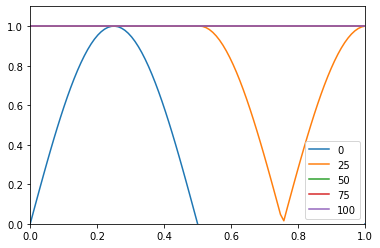

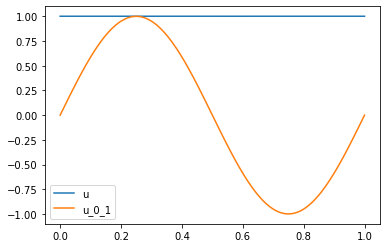

In [6]:
def u0_1(x):
    return np.sin(2*np.pi*x)
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_1(x)
N = 100
tau = 1/N
for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u,label=str(i))
        plt.axis([0, 1., 0., 1.1])
    u = Ath(u,tau,h)
plt.legend()
plt.figure()
plt.plot(x,u,label="u")
plt.plot(x,u0_1(x),label="u_0_1")
plt.legend()


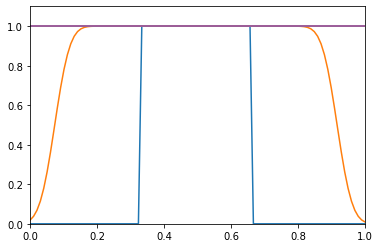

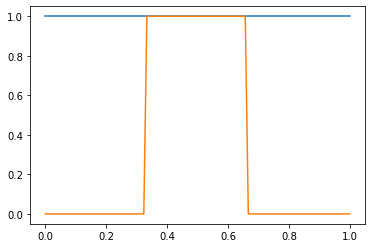

In [7]:
u0_2=lambda x : 1.*(x>=1/3)*(x<=2/3) 
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_2(x)
N = 200
tau = 1.0/N

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = Ath(u,tau,h)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_2(x))


**Q6)** On considére maintenant la variante suivante
  \begin{equation} \label{eq:hjalpha}
    \begin{cases}
      \partial_t u(t,x) = \alpha(x)|\partial_xu(t,x)| & \forall (t,x)\in[0,T]\times \mathbb T,\\
      u(0,\cdot) = u_0.
    \end{cases}
  \end{equation}
où $\alpha(x)$ est la vitesse de propgation de front ($\alpha$ est une fonction conitnue, positive bornée).
Adpter la schéma proposé dans ce cas et l'appliquer au domaine et aux conditions initiales de la question precedente avec $\alpha(x)=\frac{3}{2}+\cos(2\pi x)$. Quelle elle la condition CFL dans ce cas?

CFL : 0.505
CFL : 0.505


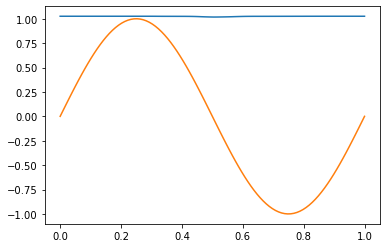

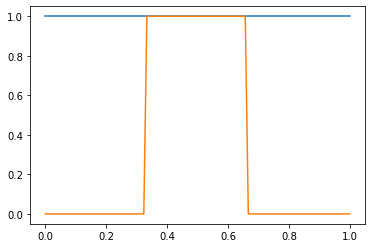

In [8]:
alpha= lambda x: 3./2+np.cos(2*np.pi*x)

def Ath_alpha(u,tau,h,x):
    return u+tau*alpha(x)*np.maximum(0,np.maximum(DP(u,h),-DM(u,h)))
M = 100
h = 1.0/(M+1)
x = np.linspace(0,1,M)
u = u0_1(x)
N = 200
tau = 1.0/N
print("CFL : %g" %(tau/h))
for i in range(N+1):
    u = Ath_alpha(u,tau,h,x)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_1(x))




u = u0_2(x)
N = 200
tau = 1.0/N
print("CFL : %g" %(tau/h))
for i in range(N+1):
    u = Ath_alpha(u,tau,h,x)
plt.figure()
plt.plot(x,u)
plt.plot(x,u0_2(x))
